In [2]:
#imports
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [3]:
#import csv and assign the attributes
col_names = ["Gender","Age","Debt","Married","BankCustomer","EducationLevel","Ethnicity","YearsEmployed","PriorDefault","Employed","CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income" , "ApprovalStatus"]
dataset = pd.read_csv("datasets/crx.data", header=None, names=col_names);
dataframe = dataset.copy()
#dataset.head(10)

In [4]:
#replace missing numeric values with mean
dataset = dataset.replace("?", np.nan)
dataset.fillna(dataset.mean(), inplace=True)

#replace missing object values with the most freequent value
for col in dataset:
    if dataset[col].dtypes == 'object':
        dataset = dataset.fillna(dataset[col].value_counts().index[0])

In [5]:
#encode values for the algorithm
#ohe = preprocessing.OneHotEncoder()

le = preprocessing.LabelEncoder()

for col in dataset:
    if dataset[col].dtypes == 'object':
        dataset[col]=le.fit_transform(dataset[col])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1266f6898>,
      dtype=object)

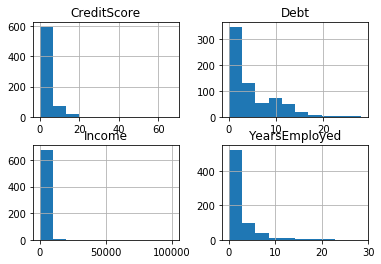

In [6]:
#ploting all non-nuisance features. we can see the data is not normally distributed hence we will use minmaxscaler
dataframe.hist()

In [7]:
#use MAD to check the spread of the observation from the mean. MAD > std because we have outliers like age, income
dataset.mad()

Gender               0.423440
Age                 82.546335
Debt                 3.941786
Married              0.370439
BankCustomer         0.727536
EducationLevel       3.875156
Ethnicity            2.395346
YearsEmployed        2.223883
PriorDefault         0.498925
Employed             0.489498
CreditScore          3.088116
DriversLicense       0.496467
Citizen              0.320311
ZipCode             40.415312
Income            1533.165402
ApprovalStatus       0.493934
dtype: float64

In [8]:
#pearsons correlation in relation to the target to see if we can get rid of features
dataset.corr()["ApprovalStatus"]

Gender            0.028934
Age              -0.133304
Debt             -0.206294
Married           0.191431
BankCustomer      0.187520
EducationLevel   -0.130026
Ethnicity        -0.000877
YearsEmployed    -0.322475
PriorDefault     -0.720407
Employed         -0.458301
CreditScore      -0.406410
DriversLicense   -0.031625
Citizen           0.100867
ZipCode           0.094851
Income           -0.175657
ApprovalStatus    1.000000
Name: ApprovalStatus, dtype: float64

In [9]:
#drop columns with the lowest correlation, or columns that do not make sense
dataset = dataset.drop(['DriversLicense', 'ZipCode', 'Ethnicity', 'Gender'], axis=1)

In [10]:
#separate the features and labels
#dataset = dataset.values
#X,y = dataset[:,0:11] , dataset[:,11]

#split the dataset into train and test
#X_train, X_test, y_train, y_test = train_test_split(dataset,
                                #y,
                                #test_size=0.25,
                                #random_state=42)

In [11]:
dataset = dataset.values
X,y = dataset[:,0:11] , dataset[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [12]:
#rescale the training and testing sets
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)
rescaledX_val = scaler.fit_transform(X_val)

In [13]:
#instantiate the algorithms
rfc = RandomForestClassifier(random_state=42)
gnb = GaussianNB()
logreg = LogisticRegression()

In [14]:
#use cross validation with 5 folds on the training data, since we have low amount of data
#produce the AUC score for each of the algorithms
print("Random Forrest")
roc_rfc = cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv = 5).mean()
f1_rfc = cross_val_score(rfc, X_train, y_train, scoring='f1', cv = 5).mean()
precision_rfc = cross_val_score(rfc, X_train, y_train, scoring='precision', cv = 5).mean()
rec_rfc = cross_val_score(rfc, X_train, y_train, scoring='recall', cv = 5).mean()
acc_rfc = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv = 5).mean()
print("AUC: " , roc_rfc)
print("F1: " , f1_rfc)
print("Precission: " , precision_rfc)
print("Recall: " , rec_rfc)
print("Accuracy: " , acc_rfc)
print("*********")
print("Naive Bayes")
roc_gnb = cross_val_score(gnb, X_train, y_train, scoring='roc_auc', cv = 5).mean()
f1_gnb = cross_val_score(gnb, X_train, y_train, scoring='f1', cv = 5).mean()
precision_gnb = cross_val_score(gnb, X_train, y_train, scoring='precision', cv = 5).mean()
rec_gnb = cross_val_score(gnb, X_train, y_train, scoring='recall', cv = 5).mean()
acc_gnb = cross_val_score(gnb, X_train, y_train, scoring='accuracy', cv = 5).mean()
print("AUC of Naive Bayes is: " , roc_gnb)
print("F1: " , f1_gnb)
print("Precission: " , precision_gnb)
print("Recall: " , rec_gnb)
print("Accuracy: " , acc_gnb)
print("*********")
print("Logistic regression")
roc_logreg = cross_val_score(logreg, X_train, y_train, scoring='roc_auc', cv = 5).mean()
f1_logreg = cross_val_score(logreg, X_train, y_train, scoring='f1', cv = 5).mean()
precision_logreg = cross_val_score(logreg, X_train, y_train, scoring='precision', cv = 5).mean()
rec_logreg = cross_val_score(logreg, X_train, y_train, scoring='recall', cv = 5).mean()
acc_logreg = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv = 5).mean()
print("AUC of Logistic Regression is: " , roc_logreg)
print("F1: " , f1_logreg)
print("Precission: " , precision_logreg)
print("Recall: " , rec_logreg)
print("Accuracy: " , acc_gnb)
print("*********")

Random Forrest


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

AUC:  0.9103706244944634
F1:  0.8609594673989998
Precission:  0.8846709056143018
Recall:  0.8414901960784313
Accuracy:  0.8460615453253965
*********
Naive Bayes
AUC of Naive Bayes is:  0.8767135804535184
F1:  0.8275527821733011
Precission:  0.7521033115399609
Recall:  0.9207843137254901
Accuracy:  0.7804066429502307
*********
Logistic regression
AUC of Logistic Regression is:  0.91946102139291
F1:  0.8770731389297156
Precission:  0.9102171435061802
Recall:  0.8491764705882353
Accuracy:  0.7804066429502307
*********


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

In [15]:
#use gridsearch to find best parameters for RandomForest
parameters = { 'max_features':np.arange(5,11),'n_estimators':[10,50,100,200,500],'min_samples_leaf': [10,50,100,200,500]}


random_grid = GridSearchCV(rfc, parameters, cv = 5)
random_grid_result = random_grid.fit(rescaledX_val, y_val)

print("Best:", random_grid_result.best_params_)

Best: {'max_features': 5, 'min_samples_leaf': 10, 'n_estimators': 10}


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
#instantiate rfc with the best parameters
rfc_best_model = RandomForestClassifier(max_features=5,min_samples_leaf=10,n_estimators=10,random_state=42)
#fit the test data
rfc_best_model.fit(X_train, y_train)
#predict
y_pred = rfc_best_model.predict(X_test)

In [17]:
#print the metrics
print("AUC: " ,  metrics.roc_auc_score(y_test,y_pred))
print("F1: " , metrics.f1_score(y_test,y_pred))
print("Precission: " , metrics.precision_score(y_test,y_pred))
print("Recall: " ,  metrics.recall_score(y_test,y_pred))

AUC:  0.8857142857142857
F1:  0.8904109589041095
Precission:  0.9154929577464789
Recall:  0.8666666666666667


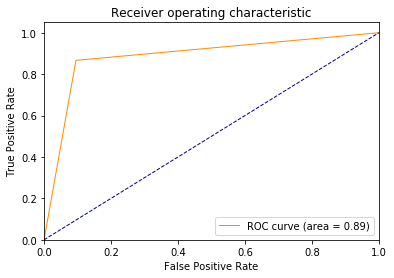

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
#compute youdens index
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr+(1-fpr), index=i), 'threshold' : pd.Series(thresholds, index=i)})
roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]
print(roc_t['threshold'])

0    2.0
Name: threshold, dtype: float64


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [20]:
threshold = 2.0

predicted_proba = rfc_best_model.predict_proba(rescaledX_test)
predicted = (predicted_proba [:,1] >= threshold).astype('bool')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.45652173913043476


In [21]:
print("Score", rfc_best_model.score(rescaledX_train, y_train))


Score 0.8526077097505669
